In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
bc = pd.read_csv('https://raw.githubusercontent.com/Navanithbs/MachineLearning/master/Datasets/brest_cancer.csv')


In [50]:
bc

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [51]:
bc.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [52]:
bc.replace('?', np.nan, inplace=True)

In [53]:
bc.isnull().sum().sort_values()

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marginal_adhesion          0
single_epith_cell_size     0
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
bare_nuclei               16
dtype: int64

In [54]:
bc2=bc.drop(['mitoses'],axis=1)

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(bc2)

In [56]:
X

array([[1.000025e+06, 5.000000e+00, 1.000000e+00, ..., 3.000000e+00,
        1.000000e+00, 2.000000e+00],
       [1.002945e+06, 5.000000e+00, 4.000000e+00, ..., 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       [1.015425e+06, 3.000000e+00, 1.000000e+00, ..., 3.000000e+00,
        1.000000e+00, 2.000000e+00],
       ...,
       [8.888200e+05, 5.000000e+00, 1.000000e+01, ..., 8.000000e+00,
        1.000000e+01, 4.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 1.000000e+01,
        6.000000e+00, 4.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 1.000000e+01,
        4.000000e+00, 4.000000e+00]])

In [57]:
bc_df =pd.DataFrame(X,columns = bc2.columns) 

In [58]:
bc_df.isnull().sum() 

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
class                     0
dtype: int64

In [59]:
bc_df['mitoses']=bc.mitoses

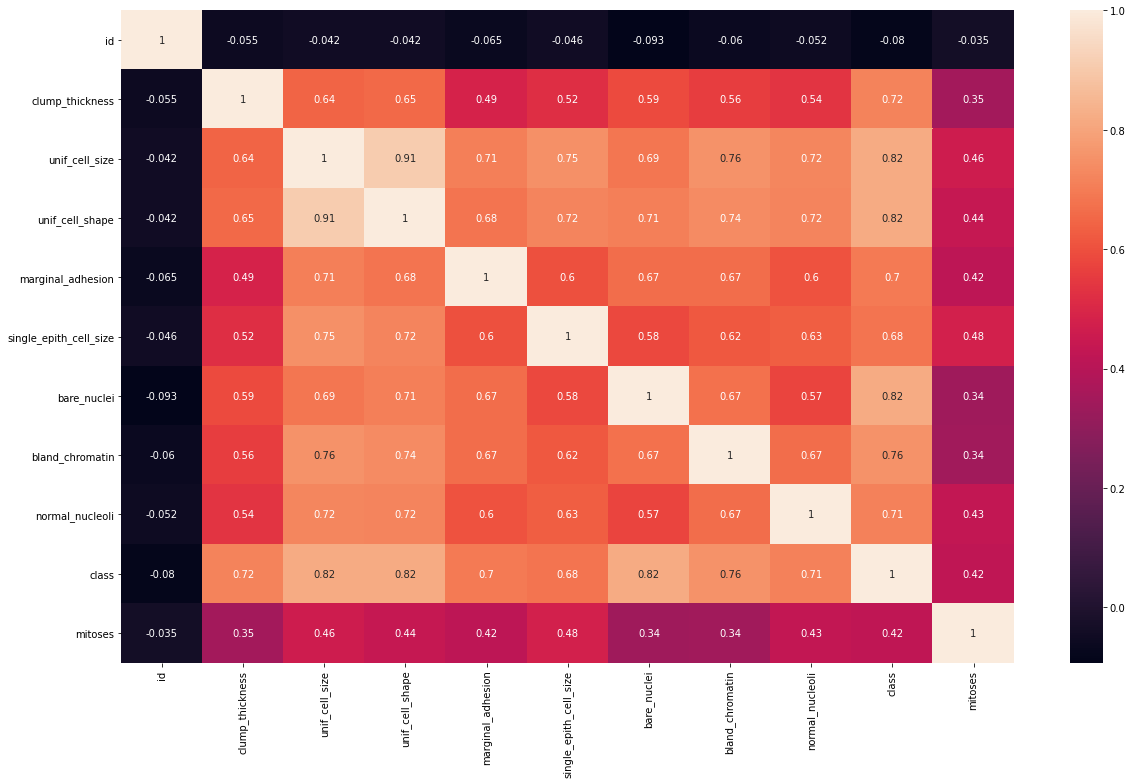

In [60]:
plt.figure(figsize=(20,12))
sns.heatmap(bc_df.corr(), annot=True)

In [62]:
bc_df.drop(['id'],axis=1,inplace=True)

**Cross Validation**

In [63]:
X=bc_df.drop(['mitoses'],axis=1)

In [64]:
X

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,4.0


In [65]:
Y=bc_df['mitoses']

In [66]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
694    1
695    1
696    2
697    1
698    1
Name: mitoses, Length: 699, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

**Decision Tree**

In [69]:
from sklearn.tree import DecisionTreeClassifier 
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [70]:
clf_tree.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
clf_tree.score(X_test, Y_test)


0.7

In [72]:
clf_tree.score(X_train, Y_train)


0.962432915921288

In [73]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [74]:
dot_data=StringIO()

In [75]:
export_graphviz(clf_tree,out_file=dot_data,feature_names=list(X.columns),filled=True,rounded=True)

In [76]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

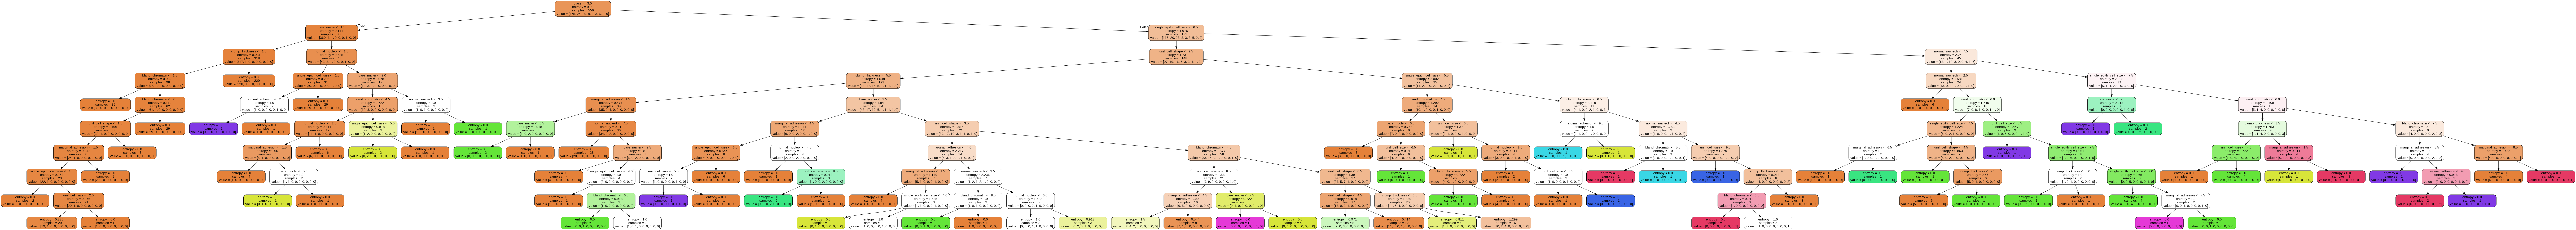

In [77]:
Image(graph.create_png())

**Performance & Predictions**

In [78]:
prediction = clf_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction)

array([[96,  2,  3,  0,  0,  0,  2,  0,  1],
       [ 8,  0,  1,  0,  0,  0,  2,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  1,  0,  0,  0,  1,  0,  2]])

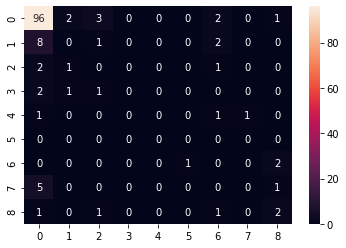

In [79]:
sns.heatmap(confusion_matrix(Y_test, prediction), annot=True, fmt='0.0f')

**Random Forest**

In [80]:
X_new = [[5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0]]#data selected from 1st row of churn_df table
clf_tree.predict(X_new)

array([1])

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(bootstrap=True, n_estimators = 200, max_depth = 10, criterion='entropy', random_state = 2)

In [82]:
clf_rf.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [83]:
clf_rf.score(X_test, Y_test)

0.75

In [84]:
prediction = clf_rf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction)

array([[103,   0,   0,   0,   0,   0,   0,   1],
       [ 11,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   1,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   1,   0,   0,   0,   0,   1]])

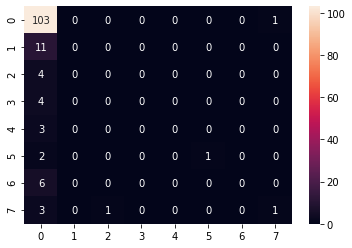

In [85]:
sns.heatmap(confusion_matrix(Y_test, prediction), annot=True, fmt='0.0f')

**Logistic Regression**

In [86]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(C = 1e7, solver='liblinear', penalty='l1', max_iter=1e8 )

In [87]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000.0, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [88]:
logit_model.score(X_test, Y_test)

0.7428571428571429

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
predictions = logit_model.predict(X_test)

In [91]:
confusion_matrix(Y_test, predictions)

array([[102,   0,   0,   0,   0,   0,   0,   2],
       [ 10,   1,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   1],
       [  1,   2,   0,   0,   1,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   1],
       [  4,   0,   0,   0,   0,   0,   0,   1]])

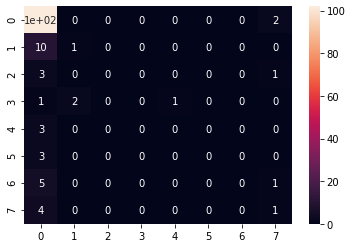

In [92]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True)